In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree    # 决策树
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier    # 分类树
from sklearn.pipeline import Pipeline    # 管道
from sklearn.feature_selection import SelectKBest    # 特征选择
from sklearn.feature_selection import chi2    # 卡方统计量🤡
from sklearn.preprocessing import MinMaxScaler    # 归一化
from sklearn.decomposition import PCA    # 主成分分析
from sklearn.model_selection import GridSearchCV    # 网格交叉验证

In [2]:
# 防止中文乱码 🐙
plt.rcParams['font.sans-serif'] = ['Heiti']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 忽略警告⚠️，暂不启用
# warnings.filterwarnings('ignore', category=FutureWarning)

#### 鸢尾花数据特征

In [4]:
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature_C = '花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

#### 数据读取 

In [5]:
fpath = './datas/iris.data'
data = pd.read_csv(fpath, header=None)
x = data[[0, 1, 2, 3]]    # 提取特征值
y = pd.Categorical(data[4]).codes    # 提取标签值,使用categorical 将其转换为0 1 2
print('样本总数量:%d，样本特征属性数量：%d' % x.shape)

样本总数量:150，样本特征属性数量：4


####  划分训练集和测试集

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9)

#### 数据标准化
    StandardScaler() 基于特征矩阵的列，将特征属性值转化为服从正态分布
    将样本的特征值转换到同一量纲下，常用于基于正态分布的算法，比如回归

#### 数据归一化
    MinMaxScaler() 区间缩放，将特征值缩放到某一区间上
    提升模型的收敛速度，提升模型精度，常用语神经网络

#### Normalizer()   
    基于样本的行，将样本向量转化为单位向量
    其目的在于样本向量在点乘运算或其他核函数计算相似性时，拥有统一的标准
    常见于文本的分类和聚类，logistics回归

#### 本次处理使用归一化处理

In [7]:
# 创建特征缩放模型默认区间是0-1，可使用feature_range参数重新设置
ss = MinMaxScaler()    
x_train = ss.fit_transform(x_train)    # 训练并转换训练集
x_test = ss.transform(x_test)

print(f'原始数据中的最小值{ss.min_}')
print(f'各数据的缩放值{ss.scale_}')

原始数据中的最小值[-1.19444444 -1.         -0.1754386  -0.04166667]
各数据的缩放值[0.27777778 0.45454545 0.1754386  0.41666667]


#### 特征选择：从已有的特征中选择出对目标值影响最大的特征属性
    常用方法：
    F统计量、卡方系数、皮尔逊相关系数   

In [8]:
# SelectKBest   使用的是卡方系数
# 从原始4个属性中选择3个属性, k 默认为10
ch2 = SelectKBest(chi2, k=3)

x_train = ch2.fit_transform(x_train, y_train)
x_test = ch2.transform(x_test)

select_name_index = ch2.get_support(indices=True)    # 选择影响最大的属性值
print(select_name_index)

[0 2 3]


#### 降维：将高维数据映射到低纬
    1、主成分分析法（PCA）  -- 有监督
    2、线性判别分析（LDA）类内方差最小  -- 无监督

In [9]:
# 创建PCA对象，最终维度设为2维
pca = PCA(n_components=2)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

#### 模型构建

In [10]:
# 使用信息熵进行决策树构建
model = DecisionTreeClassifier(criterion='entropy', random_state=9)    # 也可使用基尼系数 gini

#### 模型训练

In [11]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=9, splitter='best')

#### 模型预测

In [12]:
y_predict = model.predict(x_test)

#### 模型评估

In [13]:
y_test2 = y_test.reshape(-1)

result = (y_test2 == y_predict)
print ("准确率:%.2f%%" % (np.mean(result) * 100))
# print('模型的准确率：%.2f%%' % np.mean(result) * 100)

# 通过参数查看准确率
print('评分', model.score(x_test, y_test))
print('模型分类', model.classes_)
print('模型特征的权重', model.feature_importances_)

准确率:100.00%
评分 1.0
模型分类 [0 1 2]
模型特征的权重 [0.93434291 0.06565709]


#### 画图-数据生成

In [14]:
N = 100
x1_min = np.min((x_train.T[0].min(), x_test.T[0].min()))    # 第一个特征属性上的最小值
x1_max = np.min((x_train.T[0].max(), x_test.T[0].max()))    # x上的最大值
x2_min = np.min((x_train.T[1].min(), x_test.T[1].min()))    # 第二个特征属性上的最小值
x2_max = np.min((x_train.T[1].max(), x_test.T[1].max()))    # x上的最大值

t1 = np.linspace(x1_min, x1_max, N)     # 生成 N 个在此区间内的等差数列
t2 = np.linspace(x2_min, x2_max, N)

# 生成网格采样点
x1, x2 = np.meshgrid(t1, t2)

# 从网格采样点上生成测试点
x_show = np.dstack((x1.flat, x2.flat))[0]

y_show = model.predict(x_show)

y_show = y_show.reshape(x1.shape)     # 使之与输入的形状相同

#### 画图-要件

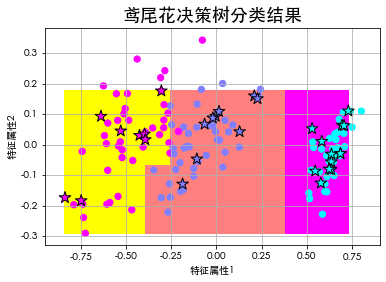

In [15]:
plt.figure(facecolor='w')

# 绘制一个颜色区域
plt.pcolormesh(x1, x2, y_show, cmap='spring')
# 绘制测试集集散点图。横轴为特征1，纵轴为特征2
plt.scatter(x_test.T[0], x_test.T[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=2, cmap='cool', marker='*')
plt.scatter(x_train.T[0], x_train.T[1], c=y_train.ravel(), s=40, cmap='cool')

plt.xlabel('特征属性1')
plt.ylabel('特征属性2')
plt.title('鸢尾花决策树分类结果', fontsize=18)
plt.grid()
plt.show()

#### 参数优化
    管道参数设置，对象名称 + __ + 参数名

In [16]:
pipe = Pipeline([
    ('mms', MinMaxScaler()),    # 归一化
    ('skb', SelectKBest(chi2)),    # 使用卡方系数选择特征
    ('pca', PCA()),    # 特降维
    ('decision', DecisionTreeClassifier(random_state=9))    # 决策树
])

# 设置参数，参数形式为 名称 + __ + 参数名
parameters = {
    'skb__k': [1, 2, 3, 4],    # 设置卡方系数筛选特征的的数量
    'pca__n_components': [0.5, 0.6, 0.99],   # 浮点数或整数，为浮点数时选择特征总量的百分比作为特征
    'decision__criterion': ['gini', 'entropy'],    # 使用基尼系数或信息熵来构建决策树
    'decision__max_depth': [1,2,3,4,5,6,7,8,9,10]    # 决策树的节点数量
}

# parameters = {
#     "skb__k": [1,2,3,4],
#     "pca__n_components": [0.5,0.99],#设置为浮点数代表主成分方差所占最小比例的阈值，这里不建议设置为数值，思考一下？
#     "decision__criterion": ["gini", "entropy"],
#     "decision__max_depth": [1,2,3,4,5,6,7,8,9,10]
# }

# 重新设置测试集
x_train2, x_test2, y_train2, t_test2 = train_test_split(x, y, test_size=0.2, random_state=9)

# 模型构建，通过网格交叉验证，找到模型的最佳参数
# cv 进行几折交叉验证
gscv = GridSearchCV(pipe, param_grid=parameters, cv=3)
# 训练数据
gscv.fit(x_train2, y_train2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('mms',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('skb',
                                        SelectKBest(k=10,
                                                    score_func=<function chi2 at 0x12c8eae18>)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('decision',
                                        DecisionTreeC...
                     

#### 查看最优参数

In [17]:
print('最优参数：', gscv.best_params_)
print('最优模型：', gscv.best_estimator_)
print('最优得分：', gscv.best_score_)

最优参数： {'decision__criterion': 'gini', 'decision__max_depth': 4, 'pca__n_components': 0.5, 'skb__k': 2}
最优模型： Pipeline(memory=None,
         steps=[('mms', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('skb',
                 SelectKBest(k=2, score_func=<function chi2 at 0x12c8eae18>)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('decision',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=4, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        

#### 使用模型预测

In [18]:
y_predict2 = gscv.predict(x_test2)
print('模型预测值与真实值的比较')
print(y_predict2)
print(y_test2)

模型预测值与真实值的比较
[2 1 2 2 1 0 0 0 1 0 0 1 1 1 0 1 0 1 2 0 0 0 2 0 2 1 0 2 0 2]
[2 1 2 2 1 0 0 0 1 0 0 1 1 1 0 1 0 1 2 0 0 0 2 0 2 1 0 2 0 2]


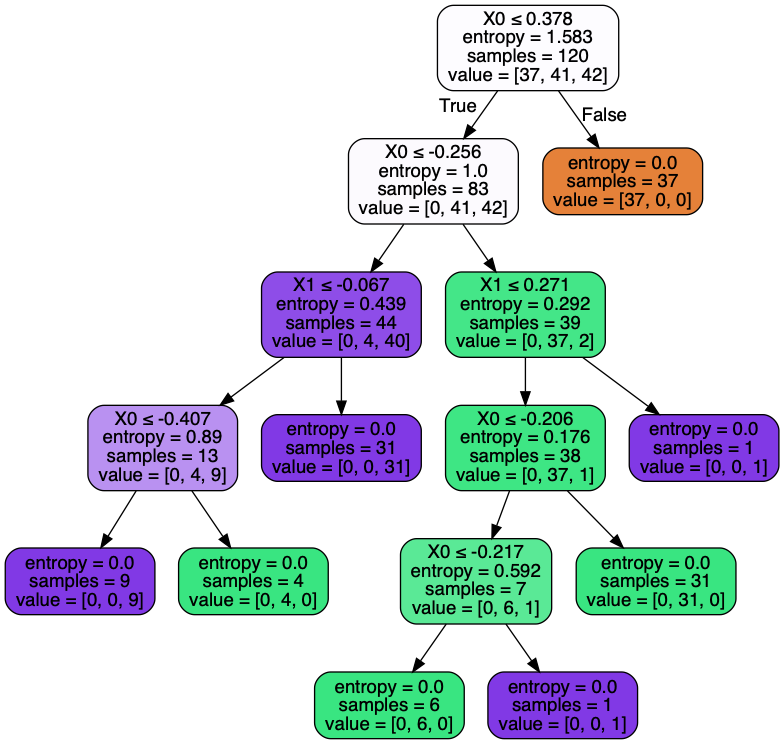

In [19]:
from sklearn import tree
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(model, out_file=None,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())